Running benchmarks with warmup...

Benchmarking: Nested List Comp


Nested List Comp: 100%|██████████| 999/999 [02:54<00:00,  5.72it/s] 



Benchmarking: Append + List Comp


Append + List Comp: 100%|██████████| 999/999 [03:22<00:00,  4.94it/s] 



Benchmarking: Nested Loops


Nested Loops: 100%|██████████| 999/999 [03:36<00:00,  4.61it/s] 



Benchmarking: Pre-allocated


Pre-allocated: 100%|██████████| 999/999 [03:24<00:00,  4.87it/s] 



Benchmarking: NumPy Random


NumPy Random: 100%|██████████| 999/999 [00:12<00:00, 82.88it/s]  



Benchmarking: List Comp (reseed)


List Comp (reseed): 100%|██████████| 999/999 [03:26<00:00,  4.83it/s] 


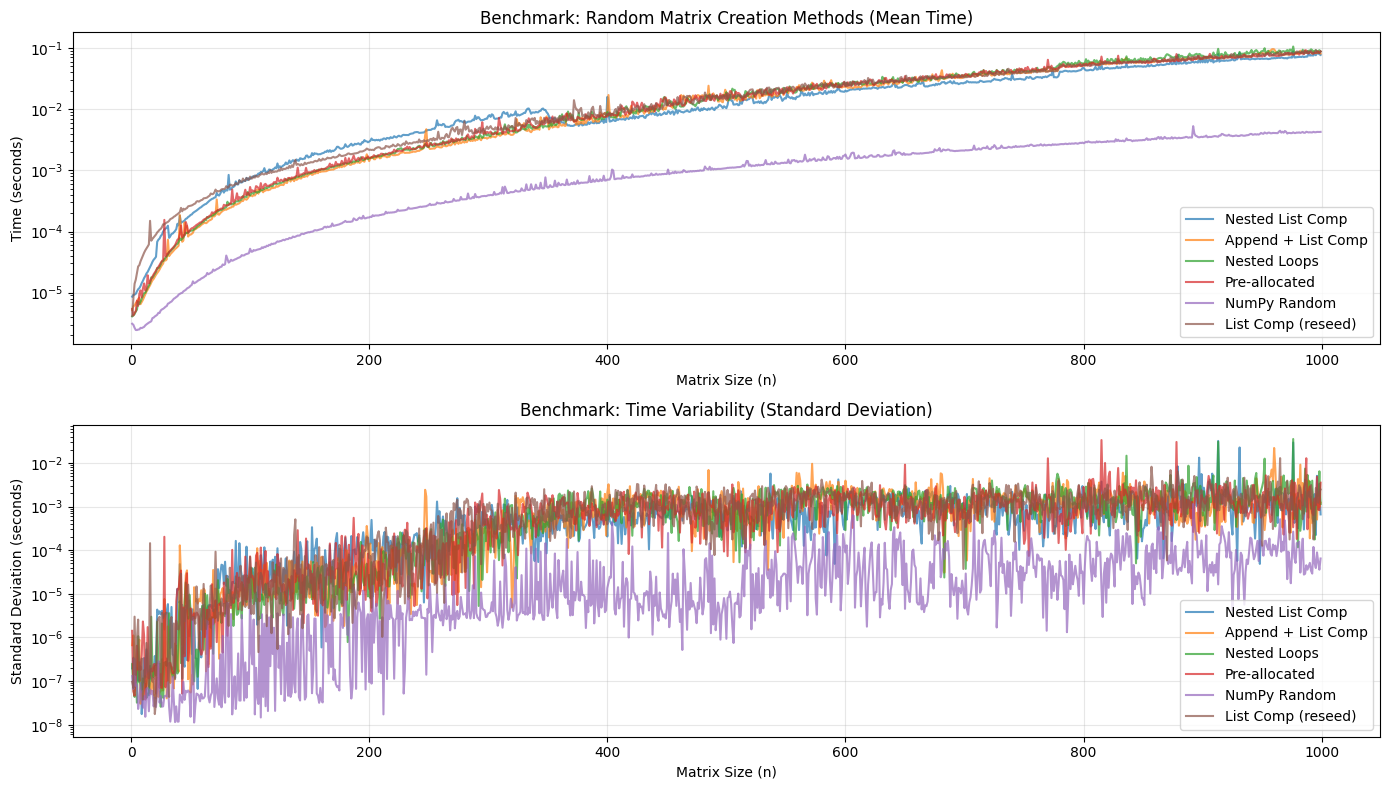


Summary Statistics for n=999 (largest size):
Nested List Comp         : 0.077023 ± 0.000659 seconds
Append + List Comp       : 0.081367 ± 0.001228 seconds
Nested Loops             : 0.087824 ± 0.001144 seconds
Pre-allocated            : 0.088075 ± 0.003513 seconds
NumPy Random             : 0.004253 ± 0.000064 seconds
List Comp (reseed)       : 0.087143 ± 0.002454 seconds


In [6]:
import numpy as np
import time 
import random 
import tqdm
import matplotlib.pyplot as plt
from statistics import mean, stdev

# Configuration
n_values = list(range(1, 1000))
seed = 42
warmup_runs = 5  # Number of warmup runs before actual benchmarking
iterations_per_size = 3  # Number of iterations per size for averaging

# Use perf_counter for more accurate timing
def benchmark_function(func, n, warmup_runs=warmup_runs, iterations=iterations_per_size):
    """Benchmark a function with warmup and multiple iterations"""
    # Warmup phase
    for _ in range(warmup_runs):
        func(n)
    
    # Actual benchmarking
    times = []
    for _ in range(iterations):
        t0 = time.perf_counter()
        func(n)
        t1 = time.perf_counter()
        times.append(t1 - t0)
    
    return mean(times), stdev(times) if len(times) > 1 else 0.0

# Define the different methods
def method1_listcomp(n):
    """Nested list comprehension"""
    random.seed(seed)
    return [[random.random() for _ in range(n)] for _ in range(n)]

def method2_append_listcomp(n):
    """Append rows with list comprehension"""
    random.seed(seed)
    A = []
    for i in range(n):
        A.append([random.random() for _ in range(n)])
    return A

def method3_nested_loops(n):
    """Nested loops with append"""
    random.seed(seed)
    A = []
    for i in range(n):
        a = []
        for j in range(n):
            a.append(random.random())
        A.append(a)
    return A

def method4_preallocated(n):
    """Pre-allocated list with nested loops"""
    random.seed(seed)
    A = [[0.0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            A[i][j] = random.random()
    return A

def method5_numpy_random(n):
    """NumPy random array"""
    np.random.seed(seed)
    return np.random.random((n, n))

def method6_listcomp_with_seed_inside(n):
    """List comprehension with random.seed inside (slower)"""
    A = []
    for i in range(n):
        random.seed(seed + i)  # Reseeding each row (inefficient)
        A.append([random.random() for _ in range(n)])
    return A

# Benchmark all methods
methods = {
    'Nested List Comp': method1_listcomp,
    'Append + List Comp': method2_append_listcomp,
    'Nested Loops': method3_nested_loops,
    'Pre-allocated': method4_preallocated,
    'NumPy Random': method5_numpy_random,
    'List Comp (reseed)': method6_listcomp_with_seed_inside,
}

results = {name: {'mean': [], 'std': []} for name in methods.keys()}

print("Running benchmarks with warmup...")
for method_name, method_func in methods.items():
    print(f"\nBenchmarking: {method_name}")
    for n in tqdm.tqdm(n_values, desc=method_name):
        mean_time, std_time = benchmark_function(method_func, n)
        results[method_name]['mean'].append(mean_time)
        results[method_name]['std'].append(std_time)

# Plotting results
plt.figure(figsize=(14, 8))

# Plot 1: Mean times
plt.subplot(2, 1, 1)
for method_name in methods.keys():
    plt.plot(n_values, results[method_name]['mean'], label=method_name, alpha=0.7)
plt.xlabel('Matrix Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Benchmark: Random Matrix Creation Methods (Mean Time)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale for better visualization

# Plot 2: Standard deviation (variability)
plt.subplot(2, 1, 2)
for method_name in methods.keys():
    plt.plot(n_values, results[method_name]['std'], label=method_name, alpha=0.7)
plt.xlabel('Matrix Size (n)')
plt.ylabel('Standard Deviation (seconds)')
plt.title('Benchmark: Time Variability (Standard Deviation)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.show()

# Summary statistics for largest size
print("\n" + "="*60)
print("Summary Statistics for n=999 (largest size):")
print("="*60)
for method_name in methods.keys():
    mean_val = results[method_name]['mean'][-1]
    std_val = results[method_name]['std'][-1]
    print(f"{method_name:25s}: {mean_val:.6f} ± {std_val:.6f} seconds")

Running quick benchmarks...

Benchmarking: Nested List Comp


Nested List Comp: 100%|██████████| 19/19 [00:00<00:00, 308.94it/s]



Benchmarking: Append + List Comp


Append + List Comp: 100%|██████████| 19/19 [00:00<00:00, 260.75it/s]



Benchmarking: Nested Loops


Nested Loops: 100%|██████████| 19/19 [00:00<00:00, 318.39it/s]



Benchmarking: Pre-allocated


Pre-allocated: 100%|██████████| 19/19 [00:00<00:00, 337.31it/s]



Benchmarking: NumPy Random


NumPy Random: 100%|██████████| 19/19 [00:00<00:00, 2808.82it/s]



Benchmarking: List Comp (reseed)


List Comp (reseed): 100%|██████████| 19/19 [00:00<00:00, 224.73it/s]


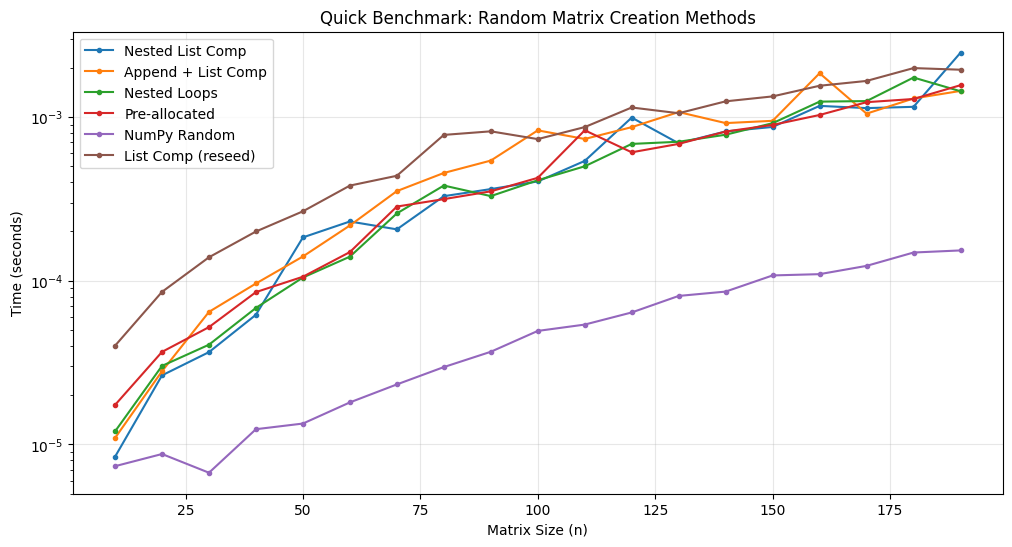

In [7]:
# Quick test version - smaller range for faster testing
# Uncomment and run this cell for a quick benchmark with fewer iterations

n_values_quick = list(range(10, 200, 10))  # Smaller range: 10 to 200, step 10
warmup_runs_quick = 3
iterations_per_size_quick = 2

results_quick = {name: {'mean': [], 'std': []} for name in methods.keys()}

print("Running quick benchmarks...")
for method_name, method_func in methods.items():
    print(f"\nBenchmarking: {method_name}")
    for n in tqdm.tqdm(n_values_quick, desc=method_name):
        mean_time, std_time = benchmark_function(method_func, n, 
                                                  warmup_runs=warmup_runs_quick, 
                                                  iterations=iterations_per_size_quick)
        results_quick[method_name]['mean'].append(mean_time)
        results_quick[method_name]['std'].append(std_time)

# Quick visualization
plt.figure(figsize=(12, 6))
for method_name in methods.keys():
    plt.plot(n_values_quick, results_quick[method_name]['mean'], label=method_name, marker='o', markersize=3)
plt.xlabel('Matrix Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Quick Benchmark: Random Matrix Creation Methods')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.show()



Relative Performance Analysis (Speedup vs Slowest Method)

Matrix Size n=10:
  NumPy Random             : 0.000003s (14.96x faster than slowest)
  Append + List Comp       : 0.000008s (5.28x faster than slowest)
  Nested Loops             : 0.000009s (4.56x faster than slowest)
  Pre-allocated            : 0.000012s (3.45x faster than slowest)
  Nested List Comp         : 0.000016s (2.58x faster than slowest)
  List Comp (reseed)       : 0.000040s (1.00x faster than slowest)

Matrix Size n=100:
  NumPy Random             : 0.000052s (15.11x faster than slowest)
  Append + List Comp       : 0.000385s (2.05x faster than slowest)
  Nested Loops             : 0.000388s (2.04x faster than slowest)
  Pre-allocated            : 0.000535s (1.48x faster than slowest)
  Nested List Comp         : 0.000725s (1.09x faster than slowest)
  List Comp (reseed)       : 0.000790s (1.00x faster than slowest)

Matrix Size n=500:
  NumPy Random             : 0.001084s (17.46x faster than slowest)
  Nested

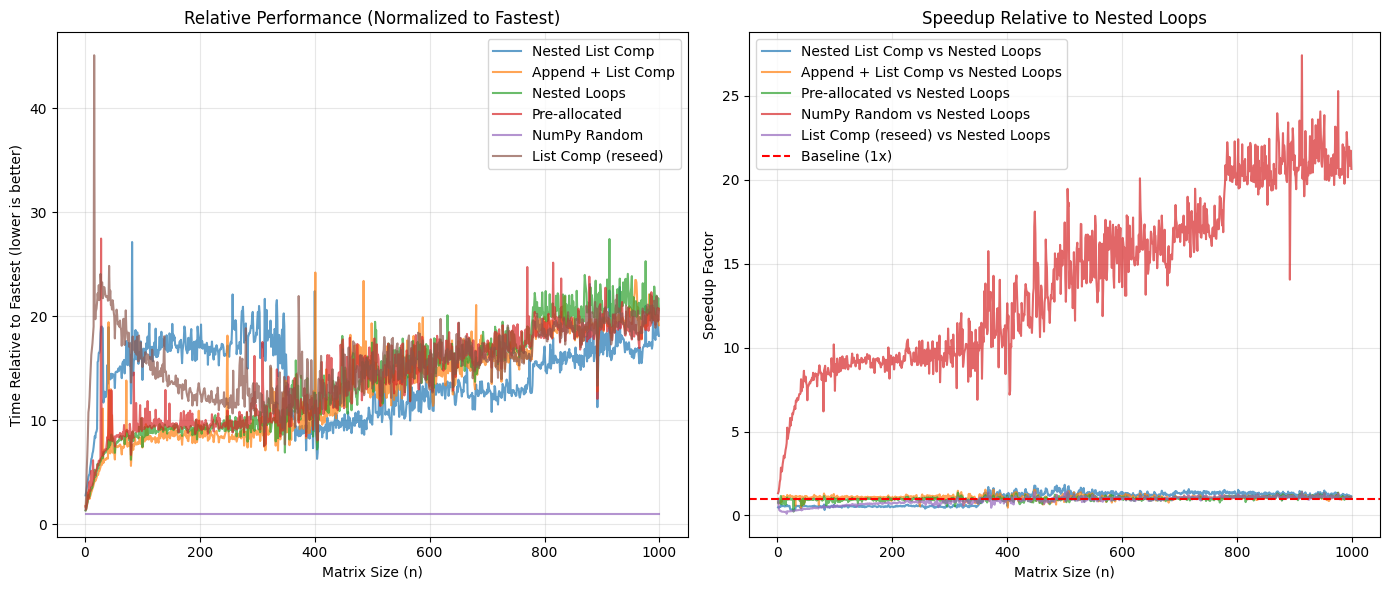

In [8]:
# Additional Analysis: Speedup ratios and relative performance
# Run this after the main benchmark to see relative performance

# Calculate speedup relative to the slowest method at each size
print("\n" + "="*60)
print("Relative Performance Analysis (Speedup vs Slowest Method)")
print("="*60)

# Find slowest method at each size
for idx, n in enumerate([10, 100, 500, 999]):  # Sample sizes
    if n > len(n_values):
        continue
    n_idx = n - 1  # Convert to index (n_values starts at 1)
    if n_idx >= len(results[list(methods.keys())[0]]['mean']):
        continue
    
    print(f"\nMatrix Size n={n}:")
    times_at_n = {name: results[name]['mean'][n_idx] for name in methods.keys()}
    slowest_time = max(times_at_n.values())
    fastest_time = min(times_at_n.values())
    
    for method_name in sorted(times_at_n.keys(), key=lambda x: times_at_n[x]):
        time_val = times_at_n[method_name]
        speedup = slowest_time / time_val
        print(f"  {method_name:25s}: {time_val:.6f}s ({speedup:.2f}x faster than slowest)")

# Plot relative performance (normalized to fastest method at each size)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
for method_name in methods.keys():
    # Normalize to the fastest method at each size
    normalized = []
    for idx in range(len(n_values)):
        times_at_size = [results[name]['mean'][idx] for name in methods.keys()]
        fastest = min(times_at_size)
        normalized.append(results[method_name]['mean'][idx] / fastest)
    plt.plot(n_values, normalized, label=method_name, alpha=0.7)
plt.xlabel('Matrix Size (n)')
plt.ylabel('Time Relative to Fastest (lower is better)')
plt.title('Relative Performance (Normalized to Fastest)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot speedup over nested loops (baseline)
plt.subplot(1, 2, 2)
baseline_method = 'Nested Loops'
baseline_times = results[baseline_method]['mean']
for method_name in methods.keys():
    if method_name == baseline_method:
        continue
    speedup = [baseline_times[i] / results[method_name]['mean'][i] 
               for i in range(len(n_values))]
    plt.plot(n_values, speedup, label=f"{method_name} vs {baseline_method}", alpha=0.7)
plt.axhline(y=1.0, color='r', linestyle='--', label='Baseline (1x)')
plt.xlabel('Matrix Size (n)')
plt.ylabel('Speedup Factor')
plt.title(f'Speedup Relative to {baseline_method}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


  0%|          | 0/999 [00:00<?, ?it/s]

100%|██████████| 999/999 [00:24<00:00, 40.38it/s]  


100%|██████████| 999/999 [00:20<00:00, 47.90it/s]  


100%|██████████| 999/999 [00:30<00:00, 33.11it/s]  


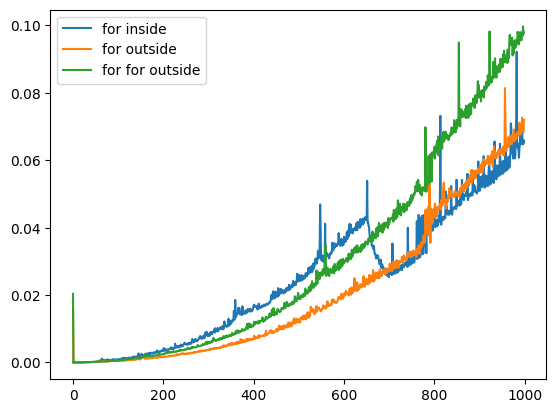